In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [46]:
X,y=make_regression(n_samples=1000,n_features=20,n_informative=20,noise=10,random_state=1)

In [47]:
mean=np.mean(X,axis=0)
std=np.std(X,axis=0)
X_norm=(X-mean)/std

In [48]:
#Add 1 column for vector

ones=np.ones((X.shape[0],1))
X_1=np.hstack((ones,X_norm))
X_1.shape, y.shape

((1000, 21), (1000,))

## Batch GD

In [49]:
# X : Matrix of m*n
# x : vector : containing single example with n feautures

def hypo(X,theta):
    return np.dot(X,theta)


def predict(X,theta):
    yp=hypo(X,theta) 
    return yp


def score(Y,Yp):
    n=np.sum((Y-Yp)**2)
    d=np.sum((Y-Y.mean())**2)
    return (1-(n/d))*100
    
    

def error(X,y,theta): #cost
    yp=hypo(X,theta)
    e=np.sum((y-yp)**2)
    return e/X.shape[0]



def gradient(X,y,theta):
    M,N=X.shape
    grad=np.zeros((N,))
    
    yp=hypo(X,theta)
    grad=np.dot(yp-y,X)
        
    return grad/M


#Batch Gradient
def gradient_descent(X,y,lr=0.1,iterations=300):
    M,N=X.shape
    theta=np.zeros((N,))
    error_list=[]
    
    for i in range(iterations):
        e=error(X,y,theta)
        error_list.append(e)
        
        #Batch Gradient=> compute grad over an entire data set
        grad=gradient(X,y,theta)
        
        theta-=lr*grad
            
    return theta,error_list

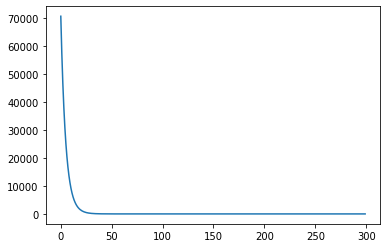

In [50]:

theta,error_list=gradient_descent(X_1,y)

plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

## Mini Batch GD

In [58]:
def gradient(X,y,theta):
    M,N=X.shape
    grad=np.zeros((N,))
    
    yp=hypo(X,theta)
    grad=np.dot(yp-y,X)
        
    return grad/M

def batch_gradient_descent(X,y,batch_size=20,learning_rate=0.01,max_iters=100): #here 1 batch_size refers to stochastic gd
    M,N=X.shape
    theta=np.zeros((N,))
    error_list=[]
    
    data=np.hstack((X,y.reshape(-1,1)))
    
    for i in range(max_iters):
        
        #Mini Gradient=> compute grad over an entire data set
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
        for i in range(total_batches):
            batch_data=data[i*batch_size:(i+1)*batch_size,:]
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            
            batch_grad=gradient(x_batch,y_batch,theta)
            e=error(x_batch,y_batch,theta)
            error_list.append(e)
            theta=theta-learning_rate*batch_grad
            
    return theta,error_list

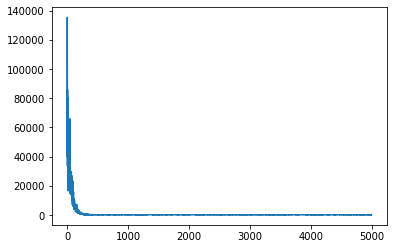

In [59]:

theta,error_list=batch_gradient_descent(X_1,y)

plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

In [60]:
theta

array([  2.9536196 ,  69.60565045,  28.02162613,  35.13758696,
        31.08610373,  40.37936243, 103.13490109,  69.9807441 ,
         5.69577126,   9.60521354,  95.2047784 ,  71.08675801,
        25.8075569 ,  29.85086142,  81.67306373,  16.1675397 ,
        77.01380825,  44.76127188,  48.19745954,  96.63172074,
        71.56258434])